# Libraties + config

In [4]:
import sys
import os

import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)


In [30]:
from importlib import reload

import neuralnetwork.neuralNetwork as neuralnetwork
import activations.elu as elu
import activations.gelu as gelu
import activations.identity as identity
import activations.lrelu as lrelu
import activations.relu as relu
import activations.sigmoid as sigmoid
import activations.tanh as tanh

import losses.mse as mse
import optimizers.gd as gd

import plot_utils.plot_utils as plot

# updates changes
reload(neuralnetwork), reload(elu), reload(gelu), reload(identity), reload(lrelu), reload(relu), reload(sigmoid), reload(tanh)
reload(plot), reload (mse), reload(gd)

from neuralnetwork.neuralNetwork import NeuralNetWork
from activations.elu import ELU
from activations.gelu import GELU
from activations.identity import Identity
from activations.lrelu import LReLU
from activations.relu import ReLU
from activations.sigmoid import Sigmoid
from activations.tanh import Tanh

from losses.mse import MSE
from optimizers.gd import GradientDescent

from plot_utils.plot_utils import plot_af

In [51]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}

font_leg = {'family' : 'DejaVu Sans',
            'weight' : 'bold',
            'size'   : 15}

# Implemetation of the Neural Network

#### Data

In [5]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
df = pd.read_csv(path)

# A little cleaning
# Columns
df.columns = df.columns.str.replace("-|/", "_", regex=True)

# nulls
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

"""
Xx = df[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]].values
y  = df[["CO2EMISSIONS"]].values
"""
#"""
X = StandardScaler().fit_transform(df[["ENGINESIZE", "FUELCONSUMPTION_COMB", "CYLINDERS"]])
y = StandardScaler().fit_transform(df[["CO2EMISSIONS"]]).reshape(-1,1)

#"""
X, X.shape

(array([[-0.9512918 , -0.88430407, -0.99896853],
        [-0.66865251, -0.5685715 , -0.99896853],
        [-1.30459092, -1.63058106, -0.99896853],
        ...,
        [-0.24469358,  0.06289365,  0.11424235],
        [-0.10337393, -0.08062116,  0.11424235],
        [-0.10337393,  0.34992326,  0.11424235]]),
 (1067, 3))

#### Neural network architecture design

In [69]:
# Init the Nn
nn = NeuralNetWork(input_shape=(None, X.shape[1]))
nn.input_shape

# Activations to use
relu = ReLU()
iden = Identity()

# architecture
nn.add(128, relu)
nn.add(64,  relu)
nn.add(32,  relu)
nn.add(32,  relu)
nn.add(1,   iden)

# Then each layer has the following shape
nn.layer_shapes

{'0': (3, None),
 '1': (128, 3),
 '2': (64, 128),
 '3': (32, 64),
 '4': (32, 32),
 '5': (1, 32)}

In [70]:
# Weights in t l-th layer
l = 2
nn.weights[f'w_{l}'], nn.weights[f'w_{l}'].shape

(array([[-0.03021235,  0.07713249, -0.00128824, ..., -0.00353889,
          0.09759454,  0.0673882 ],
        [-0.02530327,  0.00280996,  0.00718881, ...,  0.08803957,
          0.00797247,  0.03216079],
        [-0.01543768,  0.02195904, -0.0444756 , ...,  0.00952235,
         -0.07676238, -0.02843675],
        ...,
        [ 0.01406296,  0.06391656,  0.07263746, ...,  0.08351142,
          0.03563104,  0.00076041],
        [-0.04863847,  0.004435  ,  0.00120194, ...,  0.04881809,
         -0.08247181,  0.03153625],
        [-0.0478264 ,  0.08480478,  0.04281012, ...,  0.08505414,
         -0.06160647,  0.01519159]]),
 (64, 128))

##### Compiling and training

In [71]:
# compile
nn.compile_model(loss=MSE(),
                 optimizer=GradientDescent(eta=0.1))

In [72]:
# training
nn.fit(X=X, y=y, batch_size=32, epochs=30)

Epoch 1/30, Loss: 14.61834914
Epoch 2/30, Loss: 8.93731189
Epoch 3/30, Loss: 4.41931356
Epoch 4/30, Loss: 3.72142694
Epoch 5/30, Loss: 3.49359019
Epoch 6/30, Loss: 3.31150440
Epoch 7/30, Loss: 3.18005911
Epoch 8/30, Loss: 3.09751694
Epoch 9/30, Loss: 3.03244998
Epoch 10/30, Loss: 2.93137833
Epoch 11/30, Loss: 2.84816790
Epoch 12/30, Loss: 2.71774583
Epoch 13/30, Loss: 2.71798592
Epoch 14/30, Loss: 2.63181767
Epoch 15/30, Loss: 2.58577871
Epoch 16/30, Loss: 2.58665936
Epoch 17/30, Loss: 2.54269982
Epoch 18/30, Loss: 2.50561205
Epoch 19/30, Loss: 2.51592621
Epoch 20/30, Loss: 2.49424054
Epoch 21/30, Loss: 2.47808807
Epoch 22/30, Loss: 2.47718964
Epoch 23/30, Loss: 2.46944955
Epoch 24/30, Loss: 2.45559453
Epoch 25/30, Loss: 2.45360467
Epoch 26/30, Loss: 2.43507646
Epoch 27/30, Loss: 2.42810204
Epoch 28/30, Loss: 2.40669455
Epoch 29/30, Loss: 2.40020362
Epoch 30/30, Loss: 2.39427548


#### Metrics

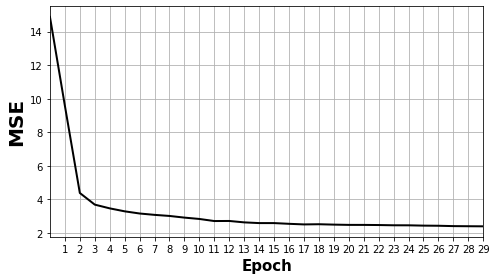

In [83]:
fig, ax = plt.subplots(figsize=(7,4))

loss_average = np.mean(np.reshape(nn.losses, (nn.epochs, -1)), axis=1)
ax.plot(loss_average, c="k", lw=2)

ax.set_xlim(0, len(loss_average)-1)
ax.set_xticks(range(1, len(loss_average)), range(1,len(loss_average)))

ax.set_xlabel("Epoch", fontdict=font_leg)
ax.set_ylabel(r"MSE", fontdict=font)

ax.grid()
plt.tight_layout()
plt.show()

#### Predictions

In [74]:
#pred
n, i = 0, 150
pred = nn.predict(X[n:n+i])

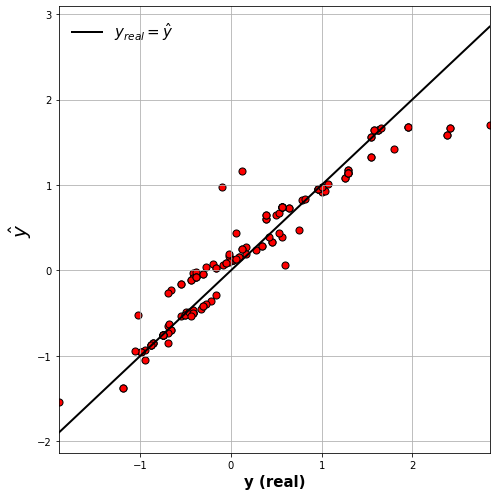

In [75]:
fig, ax = plt.subplots(figsize=(7,7))

# pred vs real
ax.scatter(x=y[n:n+i],
           y=pred[:,[0][0]],
           s=50, c="r", edgecolor='black')

# y=x
ax.plot(np.linspace(min(y[n:n+i]), max(y[n:n+i])),
        np.linspace(min(y[n:n+i]), max(y[n:n+i])),
        lw=2, c="k", label=r"$y_{real} = \hat y$")

# custum
ax.set_xlim(min(y[n:n+i]), max(y[n:n+i]))

ax.set_xlabel("y (real)", fontdict=font_leg)
ax.set_ylabel(r"$\hat y$", fontdict=font)
plt.legend(frameon=False, ncol=3, prop=font_leg)
ax.grid()
plt.tight_layout()
plt.show()